In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime


#display all rows and coloumn
pd.set_option('display.max_rows',None); # all rows
pd.set_option('display.max_columns',None); # all cloumns
pd.set_option('display.expand_frame_repr',False); #full display
pd.set_option('max_colwidth',-1); 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [ ]:
df = pd.read_csv('ODI_data.csv')
df.head(10)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,JO Holder,13*,13,38,1.0,1.0,19,0,0,68.42,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CH Gayle,11,11,49,1.0,0.0,24,1,0,45.83,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SD Hope,5,5,14,1.0,0.0,10,0,0,50,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CR Brathwaite,0,0,5,1.0,0.0,3,0,0,0,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KAJ Roach,0,0,5,1.0,0.0,3,0,0,0,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Innings Player', 'Innings Runs Scored', 'Innings Runs Scored Num',
       'Innings Minutes Batted', 'Innings Batted Flag', 'Innings Not Out Flag',
       'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate',
       'Innings Number', 'Opposition', 'Ground', 'Innings Date', 'Country',
       '50's', '100's', 'Innings Runs Scored Buckets', 'Innings Overs Bowled',
       'Innings Bowled Flag', 'Innings Maidens Bowled',
       'Innings Runs Conceded', 'Innings Wickets Taken', '4 Wickets',
       '5 Wickets', '10 Wickets', 'Innings Wickets Taken Buckets',
       'Innings Economy Rate'],
      dtype='object')

In [ ]:
len(df) , len(df.columns) # number of rows and columns

(171968, 28)

In [ ]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

# **------------------------------------------------------------------**

In [ ]:
df = df[df['Innings Runs Scored Num']!='-']
df = df.dropna(subset=['Innings Runs Scored Num'])
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [ ]:
#converting to datetime

df['Innings Date'] = pd.to_datetime(df['Innings Date']) 
df['year'] = df['Innings Date'].dt.year # extra year coloummn
df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
#changing data type object to int

df['Innings Runs Scored Num'] = df['Innings Runs Scored Num'].astype('int')
df['Innings Balls Faced'] = df['Innings Balls Faced'].astype('int')
df['Innings Not Out Flag'] = df['Innings Not Out Flag'].astype('int')

In [ ]:
#sachin 1994-2004 year of first centuries
#virat 2009-2019 year of first centuries

sachin_df = df[(df.year>=1994)&(df.year<=2004)] #filtered on the basis of time
virat_df = df[(df.year>=2009)&(df.year<=2019)]  #filtered on the basis of time

In [ ]:
sachin_df.head(5)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77612,R Dravid,60,60,87,1.0,0,68,5,0,88.23,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77613,SC Ganguly,55,55,98,1.0,0,80,2,2,68.75,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [ ]:
virat_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


# **-----------------------------------------------------------------------------------------**

# **[Calculating KPI](https://)**

*   Runs per innnings - total runs / total innings
*  SR Strike Rate -( Total runs / total balls)*100
*   number of 100s and 50s
*   Teams contri - Player runs/Team Runs









In [ ]:
df.dtypes # datat types of columns

Innings Player                   object        
Innings Runs Scored              object        
Innings Runs Scored Num          int64         
Innings Minutes Batted           object        
Innings Batted Flag              float64       
Innings Not Out Flag             int64         
Innings Balls Faced              int64         
Innings Boundary Fours           object        
Innings Boundary Sixes           object        
Innings Batting Strike Rate      object        
Innings Number                   object        
Opposition                       object        
Ground                           object        
Innings Date                     datetime64[ns]
Country                          object        
50's                             float64       
100's                            float64       
Innings Runs Scored Buckets      object        
Innings Overs Bowled             object        
Innings Bowled Flag              float64       
Innings Maidens Bowled           object 

In [ ]:
# data frame of sachin and kohli
sdf = sachin_df[sachin_df['Innings Player']=='SR Tendulkar']
kdf = virat_df[virat_df['Innings Player']=='V Kohli']

In [ ]:
sdf.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0,32,3,0,59.37,1,v Bangladesh,Chattogram,2004-12-23,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [ ]:
kdf.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0,6,0,0,16.66,2,v New Zealand,Manchester,2019-09-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
# callculation for kpi

sachin_runs = sum(sdf['Innings Runs Scored Num'])
sachin_balls = sum(sdf['Innings Balls Faced'])
sachin_innings = len(sdf)

virat_runs = sum(kdf['Innings Runs Scored Num'])
virat_balls = sum(kdf['Innings Balls Faced'])
virat_innings = len(kdf)

In [ ]:
# innnigs per runs - virat and sachin

(virat_runs/virat_innings) , (sachin_runs/sachin_innings)  

(50.20982142857143, 43.608856088560884)

In [ ]:
# strike rate - virat and sachin

(virat_runs/virat_balls)*100 , (sachin_runs/sachin_balls)*100 

(93.56126778138258, 88.21377920429947)

In [ ]:
# number of 100s virat and sachin

sum(kdf["100's"]) , sum(sdf["100's"])

(42.0, 37.0)

In [ ]:
# number of 50s virat and sachin

sum(kdf["50's"]) , sum(sdf["50's"])

(53.0, 57.0)

In [ ]:
# Team contribution -- run scored by each player , run by team
kdf_runs = sum(kdf['Innings Runs Scored Num']) 
sdf_runs = sum(sdf['Innings Runs Scored Num']) 

Team_contri_sachin = sum(sachin_df[sachin_df.Country=='India']['Innings Runs Scored Num'])
Team_contri_kohli = sum(virat_df[virat_df.Country=='India']['Innings Runs Scored Num'])

(kdf_runs/Team_contri_kohli)*100 , (sdf_runs/Team_contri_sachin)*100

(17.610033350556627, 16.951875493078962)

# **Building Comparison Models**

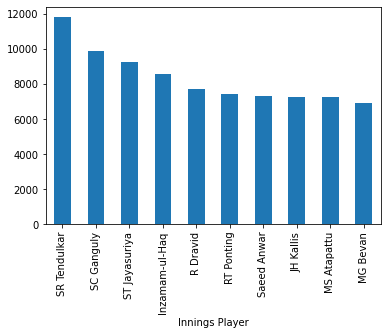

In [ ]:
## visualizations - top 10 scorer during sachins time frame

top_10_scorer_sachin_df = sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10)
top_10_scorer_sachin_df.plot(kind='bar')

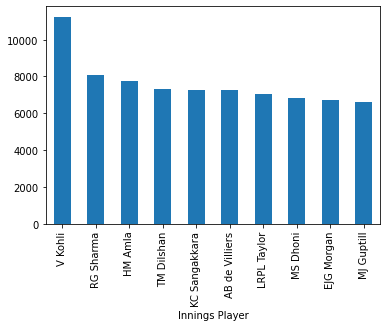

In [ ]:
## visualizations - top 10 scorer during virat time frame

top_10_scorer_virat_df = virat_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10)
top_10_scorer_virat_df.plot(kind='bar')

In [ ]:
# sachins performance over the year
sdf.groupby(['year'])['Innings Runs Scored Num'].sum()

year
1994    1089
1995    444 
1996    1611
1997    1011
1998    1894
1999    843 
2000    1328
2001    904 
2002    741 
2003    1141
2004    812 
Name: Innings Runs Scored Num, dtype: int64

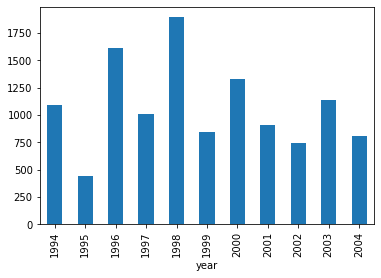

In [ ]:
sdf_runs_per_year = sdf.groupby(['year'])['Innings Runs Scored Num'].sum()
sdf_runs_per_year.plot(kind='bar')

In [ ]:
# kohlis performance over the year
kdf.groupby(['year'])['Innings Runs Scored Num'].sum()

year
2009    325 
2010    995 
2011    1381
2012    1026
2013    1268
2014    1054
2015    623 
2016    739 
2017    1460
2018    1202
2019    1174
Name: Innings Runs Scored Num, dtype: int64

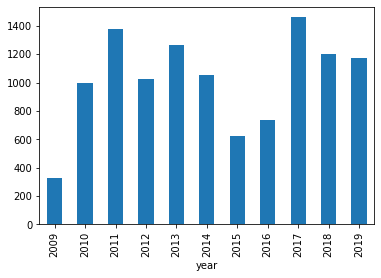

In [ ]:
kdf_runs_per_year = kdf.groupby(['year'])['Innings Runs Scored Num'].sum()
kdf_runs_per_year.plot(kind='bar')

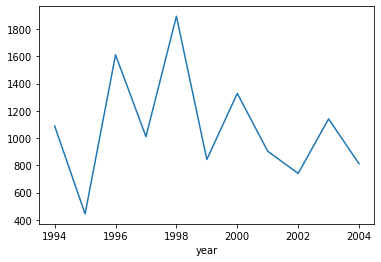

In [ ]:
# line plot for maximas and minimas

sdf_runs_per_year.plot(kind='line')

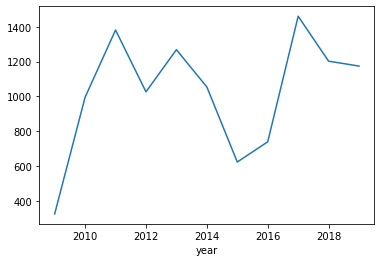

In [ ]:
# line plot for maximas and minimas
kdf_runs_per_year.plot(kind='line')

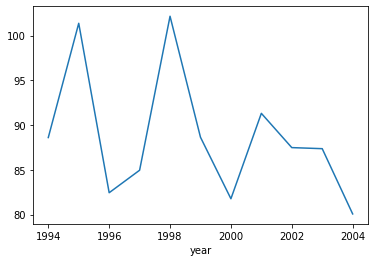

In [ ]:
# strike rate visulization - Sachin
yearwise_run_sdf = sdf.groupby(['year'])['Innings Runs Scored Num'].sum()
yearwise_balls_sdf = sdf.groupby(['year'])['Innings Balls Faced'].sum()

((yearwise_run_sdf/yearwise_balls_sdf)*100).plot(kind='line')


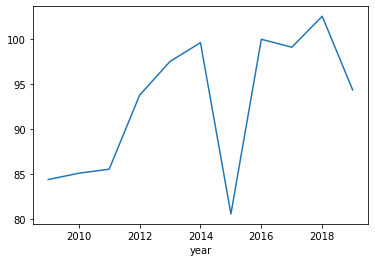

In [ ]:
# strike rate visulization - virat
yearwise_run_kdf = kdf.groupby(['year'])['Innings Runs Scored Num'].sum()
yearwise_balls_kdf = kdf.groupby(['year'])['Innings Balls Faced'].sum()

((yearwise_run_kdf/yearwise_balls_kdf)*100).plot(kind='line')


# **Normalization**

In [ ]:
sum(kdf['Innings Runs Scored Num'])/len(kdf),sum(sdf['Innings Runs Scored Num'])/len(sdf)


(50.20982142857143, 43.608856088560884)

In [ ]:
non_kohli_df = virat_df[virat_df['Innings Player']!='V Kohli']
non_sachin_df = sachin_df[sachin_df['Innings Player']!='SR Tendulkar']
sum(non_kohli_df['Innings Runs Scored Num'])/len(non_kohli_df),sum(non_sachin_df['Innings Runs Scored Num'])/len(non_sachin_df)


(24.737756786500366, 22.43512946754194)

**Normalization of run per innings**

In [ ]:
#normalization - Kohli

(sum(kdf['Innings Runs Scored Num'])/len(kdf))/(sum(non_kohli_df['Innings Runs Scored Num'])/len(non_kohli_df))

2.029683688052565

In [ ]:
#normalization - sachin

(sum(sdf['Innings Runs Scored Num'])/len(sdf))/(sum(non_sachin_df['Innings Runs Scored Num'])/len(non_sachin_df))

1.9437755485945407

In [ ]:


# callculation for kpi

sachin_runs = sum(sdf['Innings Runs Scored Num'])
sachin_balls = sum(sdf['Innings Balls Faced'])
sachin_innings = len(sdf)

virat_runs = sum(kdf['Innings Runs Scored Num'])
virat_balls = sum(kdf['Innings Balls Faced'])
virat_innings = len(kdf)

In [ ]:
# same normalization do for strike rate - Sachin 

((sum(sdf['Innings Runs Scored Num']))/(sum(sdf['Innings Balls Faced'])))/((sum(non_sachin_df['Innings Runs Scored Num']))/(sum(non_sachin_df['Innings Balls Faced'])))

1.2194651528391862

In [ ]:
# same normalization do for strike rate - Virat

((sum(kdf['Innings Runs Scored Num']))/(sum(kdf['Innings Balls Faced'])))/((sum(non_kohli_df['Innings Runs Scored Num']))/(sum(non_kohli_df['Innings Balls Faced'])))

1.121468839996732

In [ ]:
# number of matches it takes to make a century

len(kdf)/sum(kdf["100's"])6

(5.333333333333333, 7.324324324324325)